# Aufgabe

In [22]:
import pandas as pd

df = pd.read_csv("../mushrooms.csv")

# Spalten (axis=1) vorab aus den Daten entfernen:
# df = df.drop("Spaltenname", axis = 1)

# One-HotEncoding:
df = pd.get_dummies(df)

df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [18]:
#ziemlich gross!
df.count(axis="index")

class_e        8124
class_p        8124
cap-shape_b    8124
cap-shape_c    8124
cap-shape_f    8124
               ... 
habitat_l      8124
habitat_m      8124
habitat_p      8124
habitat_u      8124
habitat_w      8124
Length: 119, dtype: int64

In [19]:
print(df.columns)

Index(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=119)


In [4]:
print(*df.columns, sep='\n')

class_e
class_p
cap-shape_b
cap-shape_c
cap-shape_f
cap-shape_k
cap-shape_s
cap-shape_x
cap-surface_f
cap-surface_g
cap-surface_s
cap-surface_y
cap-color_b
cap-color_c
cap-color_e
cap-color_g
cap-color_n
cap-color_p
cap-color_r
cap-color_u
cap-color_w
cap-color_y
bruises_f
bruises_t
odor_a
odor_c
odor_f
odor_l
odor_m
odor_n
odor_p
odor_s
odor_y
gill-attachment_a
gill-attachment_f
gill-spacing_c
gill-spacing_w
gill-size_b
gill-size_n
gill-color_b
gill-color_e
gill-color_g
gill-color_h
gill-color_k
gill-color_n
gill-color_o
gill-color_p
gill-color_r
gill-color_u
gill-color_w
gill-color_y
stalk-shape_e
stalk-shape_t
stalk-root_?
stalk-root_b
stalk-root_c
stalk-root_e
stalk-root_r
stalk-surface-above-ring_f
stalk-surface-above-ring_k
stalk-surface-above-ring_s
stalk-surface-above-ring_y
stalk-surface-below-ring_f
stalk-surface-below-ring_k
stalk-surface-below-ring_s
stalk-surface-below-ring_y
stalk-color-above-ring_b
stalk-color-above-ring_c
stalk-color-above-ring_e
stalk-color-above-ring_

In [24]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df.drop(columns=["class_p", "class_e"], axis=1)
Y = df["class_e"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

1.0


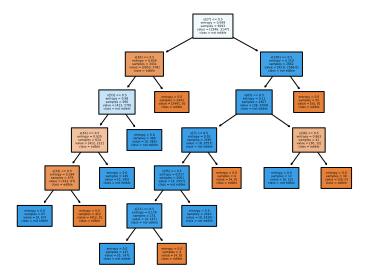

In [27]:
%matplotlib inline
%config InlineBackend.figure_formats = set(["svg"])
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=80)
plot_tree(model, 
          fontsize=3, 
          class_names = ["edible", "not edible"], 
          filled = True
         )
plt.show()